## Lens Modelling for DESIJ2318-1106
**Author(s)**: Rahul Dev Sharma

In [1]:
import lenstronomy
import numpy as np
import corner
import h5py
import matplotlib.pyplot as plt

%matplotlib inline

## Loading data from h5 Files

In [2]:
with h5py.File('DESIJ2318-1106_F140W.h5', 'r') as f:
    kwargs_data = {}
    for key in f:
        kwargs_data[key] = f[key][()]
with h5py.File('psf_F140W.h5', 'r') as f:
    kwargs_psf = {}
    for key in f:
        kwargs_psf[key] = f[key][()] 
kwargs_psf['psf_type'] = 'PIXEL'
# print(kwargs_data,kwargs_psf)

## Loading and Plotting the image data

In [ ]:
image_data = kwargs_data['image_data']
plt.matshow(np.log10(image_data), origin='lower',
            cmap='cubehelix');

## Creating Mask

180.0


C:\Users\user\AppData\Local\Temp\ipykernel_5488\247756912.py:89: RuntimeWarning: divide by zero encountered in log10
  plt.matshow(np.log10(image_data*mask), origin='lower', cmap='cubehelix')
C:\Users\user\AppData\Local\Temp\ipykernel_5488\247756912.py:89: RuntimeWarning: invalid value encountered in log10
  plt.matshow(np.log10(image_data*mask), origin='lower', cmap='cubehelix')


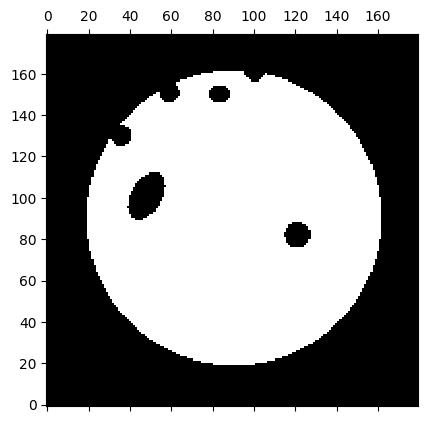

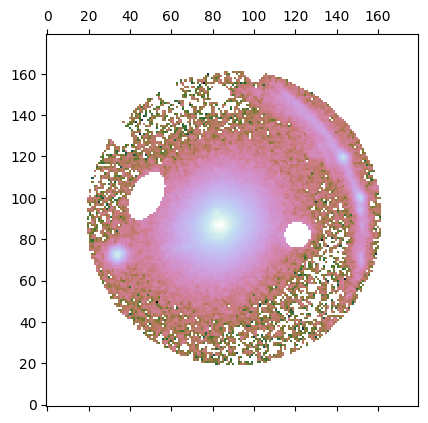

In [139]:
from lenstronomy.Util import mask_util, util
from lenstronomy.Data.coord_transforms import Coordinates

ra_at_xy_0 = kwargs_data['ra_at_xy_0']
dec_at_xy_0 = kwargs_data['dec_at_xy_0']
transform_pix2angle = kwargs_data['transform_pix2angle']

coords = Coordinates(transform_pix2angle, ra_at_xy_0, dec_at_xy_0)
num_pix = len(kwargs_data['image_data'])

x_coords, y_coords = coords.coordinate_grid(num_pix, num_pix)

# print(x_coords)
# print(y_coords)
# print(num_pix)
r = 5.7 # arcsecond
lens_center_ra = 0
lens_center_dec = 0

mask_outer = mask_util.mask_center_2d(lens_center_ra,
                                      lens_center_dec,
                                      r,
                                      util.image2array(x_coords),
                                      util.image2array(y_coords))

mask_ext_1 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra+0.55,
                                   lens_center_dec+4.8,
                                   0.4, 0.35, 0)

mask_ext_2 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra+3.4,
                                   lens_center_dec+0.85,
                                   1, 0.6, np.pi/1.5)

mask_ext_3 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra-2.45,
                                   lens_center_dec-0.648,
                                   0.5, 0.5, 0)

# mask_ext_4 = mask_util.mask_ellipse(util.image2array(x_coords),
#                                    util.image2array(y_coords),
#                                    lens_center_ra-2.8,
#                                    lens_center_dec+3.5,
#                                    2.7, 0.7, np.pi/0.81)

# mask_ext_5 = mask_util.mask_ellipse(util.image2array(x_coords),
#                                    util.image2array(y_coords),
#                                    lens_center_ra-4.6,
#                                    lens_center_dec-.23,
#                                    2.23, 0.55, np.pi/0.67)

# mask_ext_6 = mask_util.mask_ellipse(util.image2array(x_coords),
#                                    util.image2array(y_coords),
#                                    lens_center_ra+4.26,
#                                    lens_center_dec-1.26,
#                                    0.6, 0.6, np.pi/1.5)

mask_ext_7 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra+4.38,
                                   lens_center_dec+3.2,
                                   0.4, 0.4, np.pi/1.5)

mask_ext_8 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra+2.5,
                                   lens_center_dec+4.87,
                                   0.4, 0.4, np.pi/1.5)

mask_ext_9 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra-.8,
                                   lens_center_dec+5.7,
                                   0.4, 0.4, np.pi/1.5)

mask = (1 - mask_outer) *\
       (1- mask_ext_1) *\
       (1 - mask_ext_3) *\
       (1 - mask_ext_2) *\
       (1 - mask_ext_7) *\
       (1 - mask_ext_8) *
       (1 - mask_ext_9)

mask[mask >= 1] = 1
mask[mask < 0] = 0
print(np.sqrt(mask_outer.size))

mask = mask.reshape(180, 180)

plt.matshow(mask, origin='lower', cmap='cubehelix')
plt.matshow(np.log10(image_data*mask), origin='lower', cmap='cubehelix')

### Specifying the Model Names

In [110]:
lens_model_list = ['EPL', 'SHEAR']
source_model_list = ['SERSIC_ELLIPSE', 'SHAPELETS'] 
lens_light_model_list = ['SERSIC_ELLIPSE']

## Specifying initial, upper, lower values and sigma
In this cell below, we have to specify the initial values, upper and lower
limits for the model parameters specific to each of the model components
specified in the above lists. The `kwargs_*_sigma` dictionaries/lists are
used to set the initial size of the search area within particle swarm
optimization (PSO) or MCMC.

In [141]:
# lens galaxy's mass model
fixed_lens = []
kwargs_lens_init = []
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []


fixed_lens.append({})
fixed_lens.append({'ra_0': 0, 'dec_0': 0})

kwargs_lens_init.append({'theta_E': 1., 'gamma': 2., 'e1': 0., 'e2': 0.,
                         'center_x': 0., 'center_y': 0.})

kwargs_lens_init.append({'gamma1': 0., 'gamma2': 0.})
                    



    
kwargs_lens_sigma.append({'theta_E': .2, 'gamma': .1, 'e1': 0.05, 'e2': 0.05,
                         'center_x': 0.5, 'center_y': 0.5})

kwargs_lens_sigma.append({'gamma1': 0.1, 'gamma2': 0.1})





kwargs_lower_lens.append({'theta_E': 0.01, 'gamma': 1., 'e1': -0.5,
                          'e2': -0.5, 'center_x': -10, 'center_y': -10})

kwargs_lower_lens.append({'gamma1': -0.3, 'gamma2': -0.3})




kwargs_upper_lens.append({'theta_E': 10., 'gamma': 3., 'e1': 0.5,
                          'e2': 0.5, 'center_x': 10, 'center_y': 10})

kwargs_upper_lens.append({'gamma1': 0.3, 'gamma2': 0.3})



lens_params = [kwargs_lens_init, kwargs_lens_sigma, fixed_lens,
               kwargs_lower_lens, kwargs_upper_lens]


# lens galaxy's light model
fixed_lens_light = []
kwargs_lens_light_init = []
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []

fixed_lens_light.append({'n_sersic': 4.})
kwargs_lens_light_init.append({'R_sersic': 0.5, 'n_sersic': 2, 'e1': 0,
                               'e2': 0, 'center_x': 0., 'center_y': 0,
                               'amp': 16})

kwargs_lens_light_sigma.append({'n_sersic': 1, 'R_sersic': 0.3, 'e1': 0.05, 
                                'e2': 0.05, 'center_x': 0.1, 'center_y': 0.1,
                                'amp': 10})

kwargs_lower_lens_light.append({'e1': -0.5, 'e2': -0.5, 'R_sersic': 0.001, 
                                'n_sersic': .5, 'center_x': -10,
                                'center_y': -10, 'amp': 0})

kwargs_upper_lens_light.append({'e1': 0.5, 'e2': 0.5, 'R_sersic': 10, 
                                'n_sersic': 5., 'center_x': 10, 
                                'center_y': 10, 'amp': 100})

joint_lens_with_light = [[0, 0, ['center_x', 'center_y', 'e1', 'e2']]]

lens_light_params = [kwargs_lens_light_init, kwargs_lens_light_sigma,
                     fixed_lens_light, kwargs_lower_lens_light,
                     kwargs_upper_lens_light]


# source galaxy's light model
fixed_source = []
kwargs_source_init = []
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []

fixed_source.append({'n_sersic': 1.})

fixed_source.append({'n_max': 5}) 

kwargs_source_init.append({'R_sersic': 0.2, 'n_sersic': 1, 'e1': 0,
                           'e2': 0, 'center_x': 0., 'center_y': 0,
                           'amp': 16})

kwargs_source_init.append({'beta': 3, 'center_x': 0, 'center_y': 0}) 

kwargs_source_sigma.append({'n_sersic': 0.5, 'R_sersic': 0.5, 'e1': 0.05,
                            'e2': 0.05,'center_x': 0.2, 'center_y': 0.2,
                            'amp': 10})

kwargs_source_sigma.append({'beta': 2, 'center_x': 0.2, 'center_y': 0.2}) 

kwargs_lower_source.append({'e1': -0.5, 'e2': -0.5, 'R_sersic': 0.001,
                            'n_sersic': .5, 'center_x': -10, 'center_y': -10,
                            'amp': 0})

kwargs_lower_source.append({'beta': 0, 'center_x': -10, 'center_y': -10}) 

kwargs_upper_source.append({'e1': 0.5, 'e2': 0.5, 'R_sersic': 10, 
                            'n_sersic': 5., 'center_x': 10, 'center_y': 10,
                            'amp': 100})

kwargs_upper_source.append({'beta': 5, 'center_x': 10, 'center_y': 10})  

source_params = [kwargs_source_init, kwargs_source_sigma, fixed_source,
                 kwargs_lower_source, kwargs_upper_source]

joint_source_with_source = [[0, 1, ['center_x', 'center_y']]]

# combining all the above specification in the `kwargs_params` dictionary
kwargs_params = {'lens_model': lens_params,
                 'source_model': source_params,
                 'lens_light_model': lens_light_params}


kwargs_constraints = {'joint_lens_with_light': joint_lens_with_light, 
                      'joint_source_with_source' : joint_source_with_source}

#### Numerical settings

No need to change anything here for now. It's also fine to not
understand these settings for now.

In [142]:
kwargs_likelihood = {'check_bounds': True,
                    'image_likelihood_mask_list': [mask]}

kwargs_numerics = {'supersampling_factor': 1,
                   'supersampling_convolution': False
                   }

#### Combining all the information to be sent to lenstronomy

In [143]:
kwargs_model = {'lens_model_list': lens_model_list,
                'source_light_model_list': source_model_list,
                'lens_light_model_list': lens_light_model_list}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {'multi_band_list': multi_band_list,
                     'multi_band_type': 'single-band'
                     # 'multi-linear': every imaging band
                     # has independent solutions of the 
                     # surface brightness, 'joint-linear': 
                     # there is one joint solution of the 
                     # linear coefficients demanded across the bands.
                    }

## Here the model fiting is done

In [ ]:
from lenstronomy.Workflow.fitting_sequence import FittingSequence


fitting_seq = FittingSequence(kwargs_data_joint, kwargs_model, 
                              kwargs_constraints, kwargs_likelihood,
                              kwargs_params)

fitting_kwargs_list = [['PSO', {'sigma_scale': 1., 'n_particles': 200,
                                'n_iterations': 100}]]


chain_list = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit()

Computing the PSO ...
10
20
30
40
50
60
70
80


## Visualizing the fitted model

-6.087750400614201 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  6.087750397284225


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lenstronomy\Plots\model_band_plot.py:43: RuntimeWarning: invalid value encountered in log10
  log_model = np.log10(model)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lenstronomy\Plots\model_band_plot.py:136: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
C:\Users\user\AppData\Local\Temp\ipykernel_5488\2155025866.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


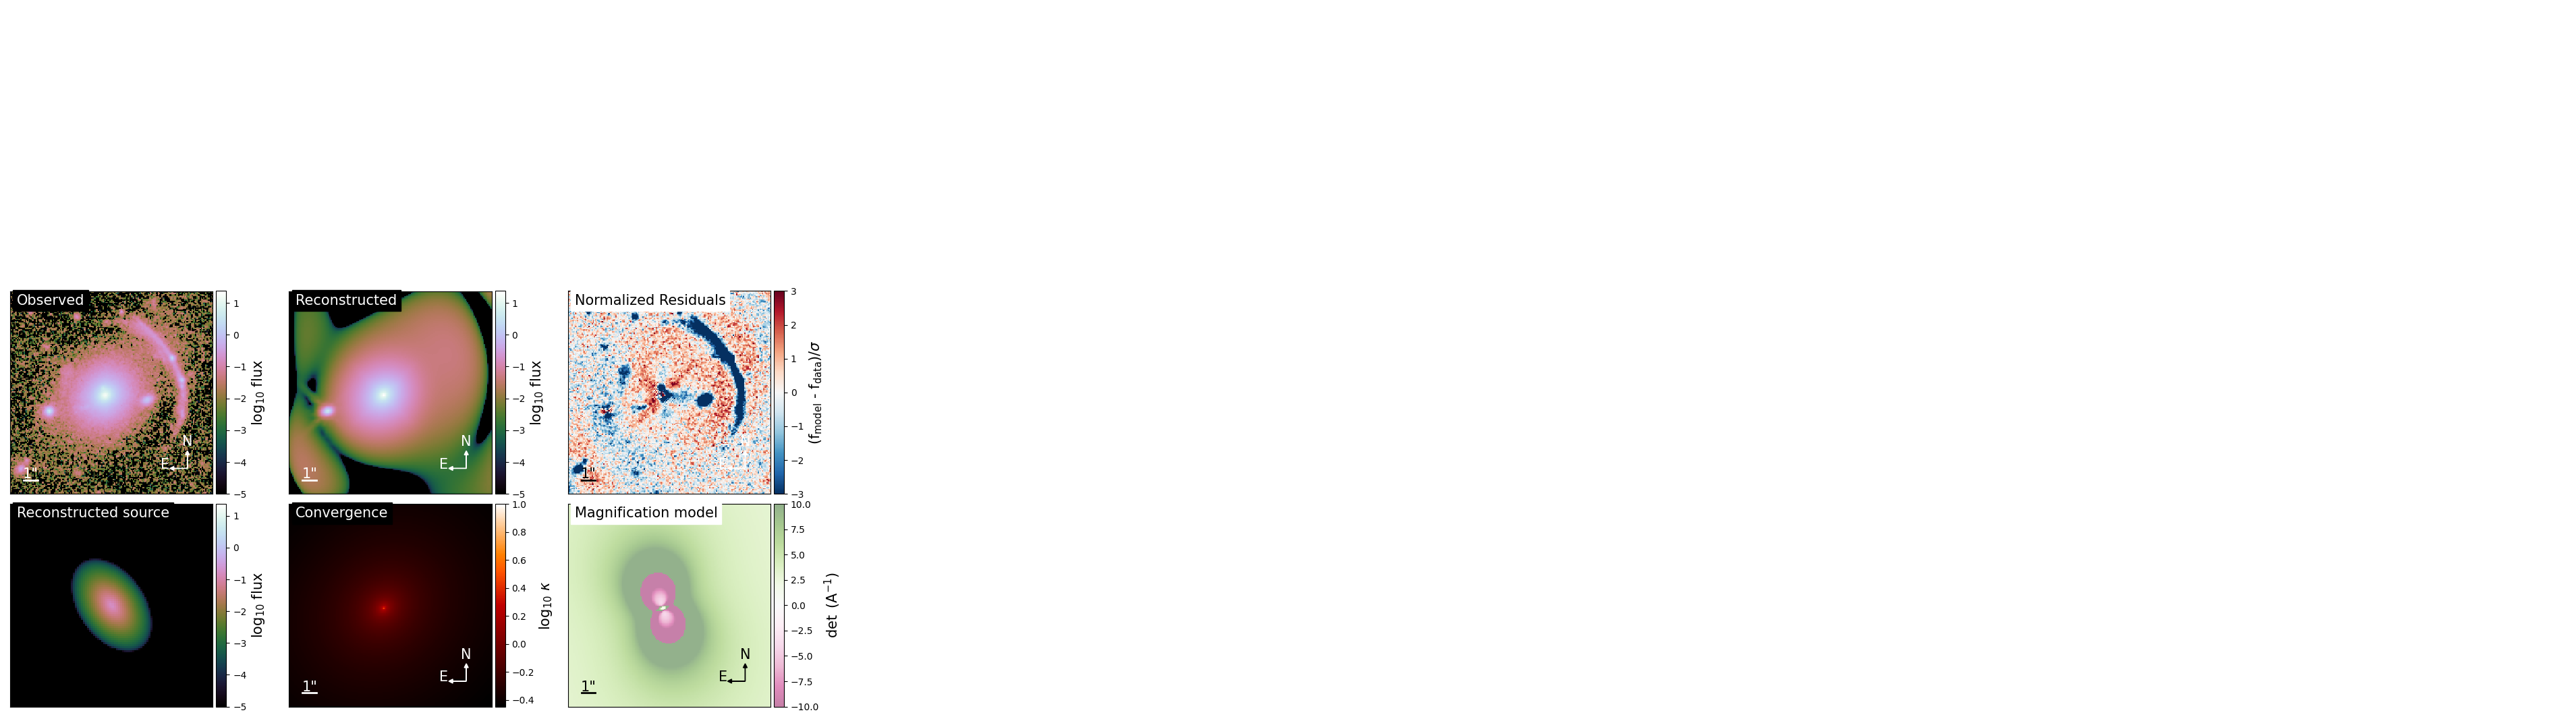

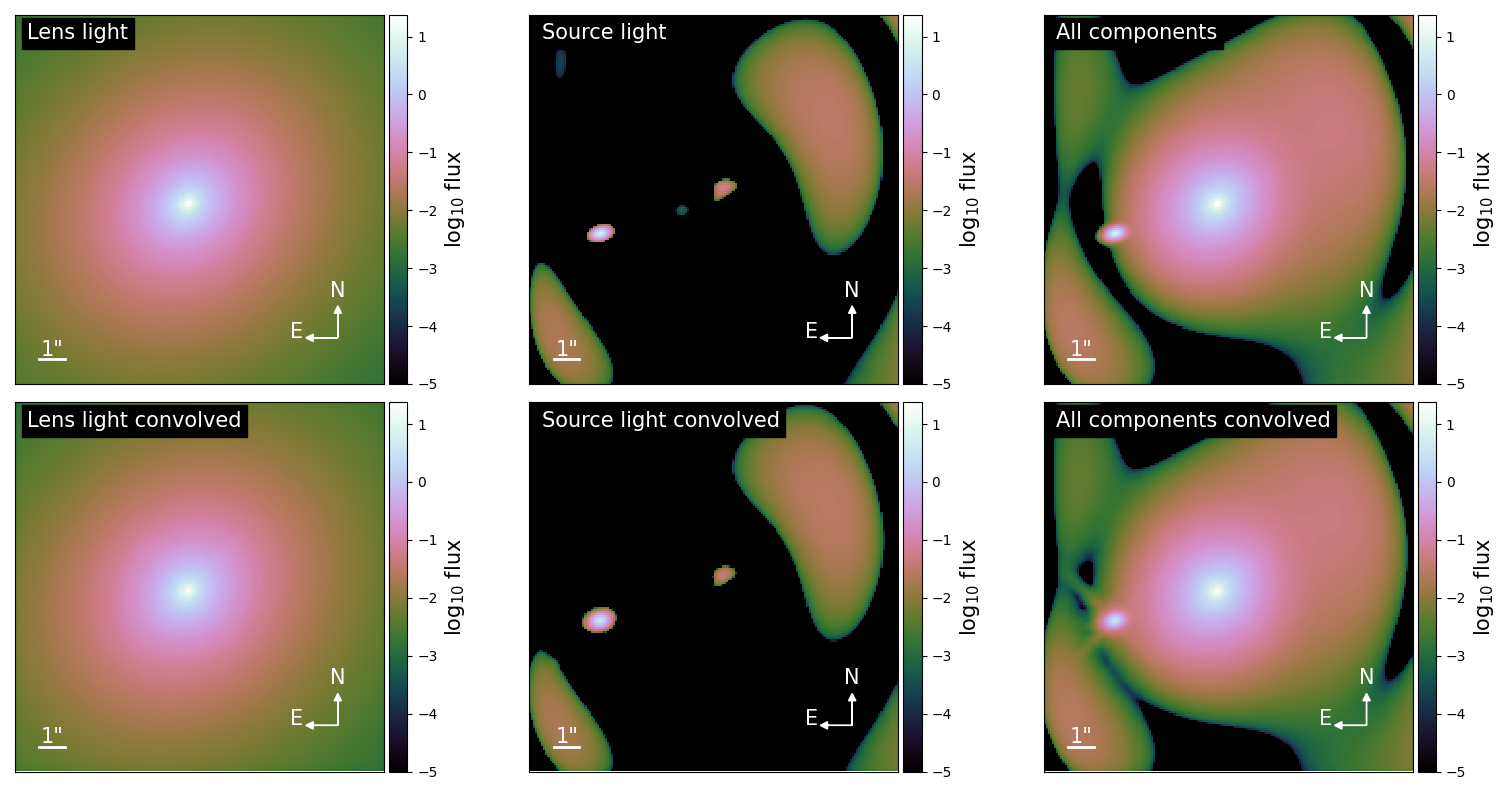

{'kwargs_lens': [{'theta_E': 0.9630146872398152, 'gamma': 1.3430280413843385, 'e1': 0.00824007184031555, 'e2': -0.07879492611912031, 'center_x': 0.5454554138261817, 'center_y': -0.2713080072031913}, {'gamma1': 0.22644208433922358, 'gamma2': -0.24005798553700672, 'ra_0': 0, 'dec_0': 0}], 'kwargs_source': [{'amp': 1, 'R_sersic': 0.056242801159214935, 'n_sersic': 1.0, 'e1': -0.07909459270913342, 'e2': 0.21290233531475275, 'center_x': 0.793444627751864, 'center_y': -0.12288231767977507}, {'amp': 1, 'n_max': 5, 'beta': 3.5349979243884784, 'center_x': 0.793444627751864, 'center_y': -0.12288231767977507}], 'kwargs_lens_light': [{'amp': 1, 'R_sersic': 1.1597745656087757, 'n_sersic': 4.0, 'e1': 0.00824007184031555, 'e2': -0.07879492611912031, 'center_x': 0.5454554138261817, 'center_y': -0.2713080072031913}], 'kwargs_ps': [], 'kwargs_special': {}, 'kwargs_extinction': []}


In [146]:
from lenstronomy.Plots.model_plot import ModelPlot

modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result,
                      arrow_size=0.02, cmap_string="cubehelix",
                      )

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False,
                       sharey=False)

modelPlot.data_plot(ax=axes[0,0])
modelPlot.model_plot(ax=axes[0,1])
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-3, v_max=3,
                                   cmap='RdBu_r')
modelPlot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1, cmap='gist_heat')
modelPlot.magnification_plot(ax=axes[1, 2], cmap='PiYG')
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., 
                  hspace=0.05)
plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', 
                             lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved',
                             lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light',
                             source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved',
                             source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', 
                             source_add=True, lens_light_add=True,
                             unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved',
                             source_add=True, lens_light_add=True,
                             point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None,
                  wspace=0., hspace=0.05)
plt.show()
print(kwargs_result)